# TP 2 - Arbres de Décision, Forêt Aléatoire, Cross-validation, Hyperparameter tuning

# **Arbres de décision**

**I - Arbres de Classification**

---




# **Exercice**
On considère le dataset iris disponible sous datasets de sklearn. Réaliser la classification à l'aide des arbres de décision.

### A-Chargement des bibilothèques

In [161]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

### B-Charger le jeu de données
Il s'agit du jeu de données Iris de Scikit-Learn prêt à l'emploi [scikit-learn Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

In [162]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X=df[data.feature_names]
y=df['target']

### C-Diviser les données en un dataset d'apprentissage et un dataset de test

a-Importer la méthode train_test_split

In [163]:
from sklearn.model_selection import train_test_split

b- Diviser le dataset

In [164]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### D-Modèle ML - DecisionTreeClassifier - Implémentation scikit-learn

<b>a-</b> Importer le modèle machine Learning souhaité - ici on va importer le modème arbres de décision. Dans scikit-learn, les modèles ML sont implémentés sous forme de classes Python.

In [165]:
# Importer DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

<b>b-</b> Créer une instance du modèle
Préciser les hyperparamètres du modèle. Ici, on pourra préciser la profondeur maximale de l'arbre et choisir une valeur quelconque pour la variable random_state (pour garantir un comportement déterministe durant le training).
Pour mieux maitriser les différents hyperparamètres de la classe DecisionTreeClassifier : voir [sklearn-Classe DecisionTtreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#)

In [166]:
dt =  DecisionTreeClassifier(max_depth=3, random_state=42)

**Question 1** : Quel est le critère de subdivision utilisé ? Est ce celui de GINI ou l'Entropie?

1 : Le critère de subdivision utilisé par défaut par DecisionTreeClassifier dans sklearn est le critère Gini. Cependant, cela peut être modifié en utilisant le paramètre criterion lors de l'instanciation du modèle.

**Question 2** : Instancier le modèle avec le critère "Entropie".

Pour instancier le modèle avec le critère "Entropie", vous pouvez utiliser le code suivant :

In [167]:
# Instancier le modèle avec le critère "Entropie"
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

<b>c-</b> Entrainement du modèle : Le modèle va apprendre la relation entre les caractéristiques (largeur et longeuers des sépales et des pétales) et la classe de le l'iris.

In [168]:
# Entraînement du modèle
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

<b>b-</b> Prédire les classes des nouvelles entrées (test data)

In [169]:
# Prédire les classes des nouvelles entrées
Y_pred = dt.predict(X_test)

### E- Evaluer les performances du modèle

C'est possible d'utiliser les métriques d'évaluation d'un modèle de classification : Rappel/précision, score F1, courbe ROC [ROC Curve](https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0), etc). On propose d'utiliser l'accuracy = Pourcentage des prédictions correctes (predictions correctes / taille du dataset). cette métrique est implémentée dans la méthode score () de sklearn

In [170]:
# Métrique pour le dataset Test
score1 = dt.score(X_test, Y_test)
# Métrique pour le dataset Train
score2 = dt.score(X_train, Y_train)
print(score1, score2)

1.0 0.9583333333333334


**Question** : Que remarquez vous ?

On remarque que les performances du modèle sont très bonnes. En effet, l'accuracy est de 1, ce qui signifie que le modèle a prédit correctement la classe de toutes les instances du dataset de test.

## F- Visualiser l'arbre de décision - Matplotlib

In [171]:
# Pour la visualization de l'arbre
from sklearn import tree

Les arbres de décision peuvent être affichés avec matplotlib en utilisant `tree.plot_tree`.

In [172]:
%matplotlib inline
import matplotlib.pyplot as plt

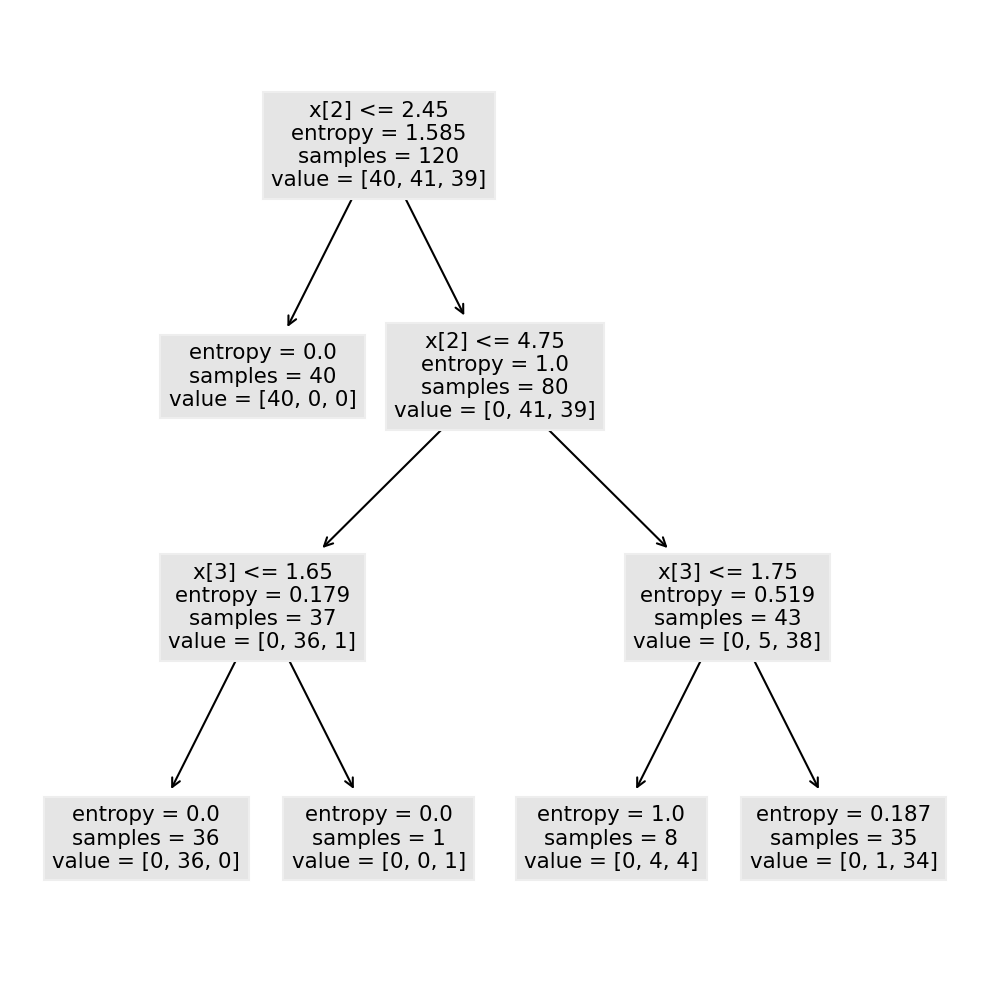

In [173]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dt);
fig.savefig('./plottreedefault.png')

In [174]:
# Ajouter les noms des caractéristiques  et des classes au niveau de cahque noeud
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

4
3


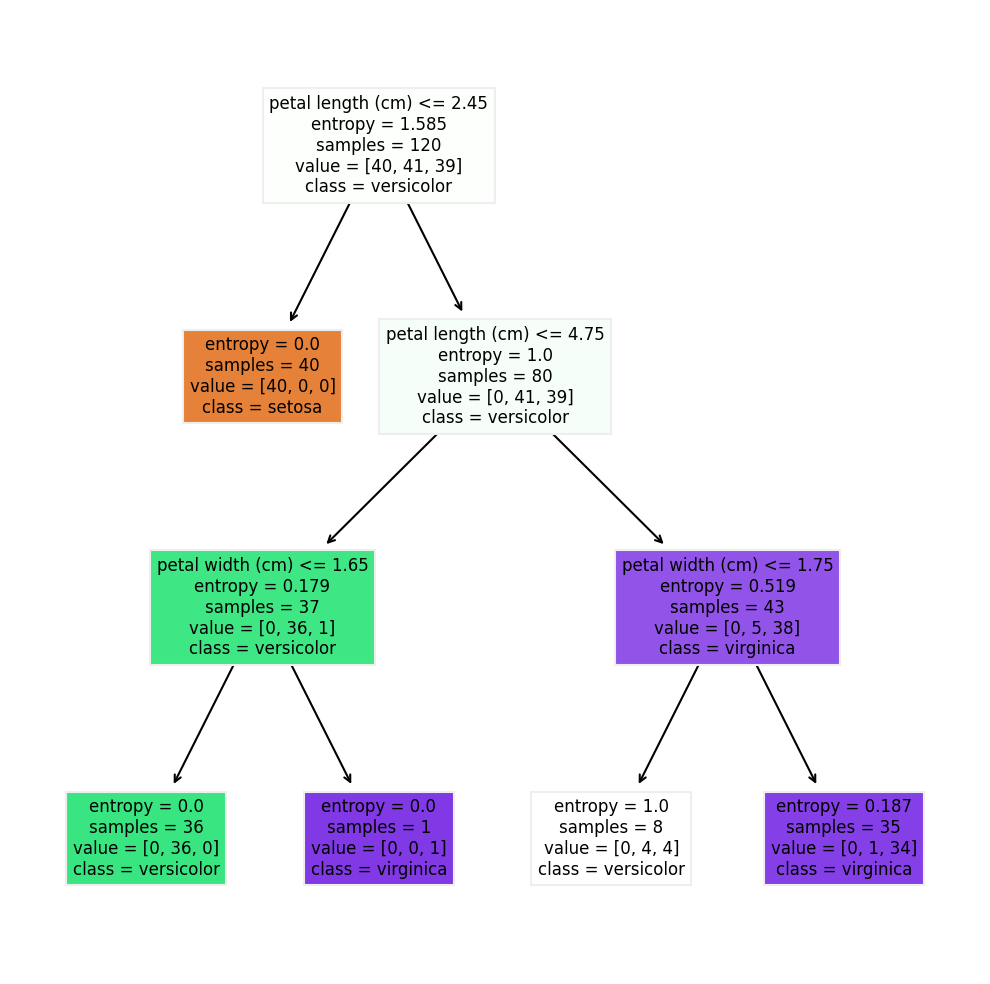

In [175]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

print(len(fn))  # doit être égal au nombre de caractéristiques dans votre modèle
print(len(cn))  # doit être égal au nombre de classes dans votre modèle

tree.plot_tree(dt,
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('./plottreefncn.png')

# G-Impact de la profondeur de l'arbre
Pour étudier l'impact du chooix de la profondeur de l'arbre, nous allons considérer le dataset breast cancer (à charger à partir de datasets de sklearn).
**Question** : On se propose de réaliser la classification en utilisant différentes valeurs de max_depth ( à stocker dans un vecteur numpy max_depths).
Exécuter le modèle pour chacune de ces valeurs et sauvegarder à chaque fois les scores de l'entraînement et du test. Utiliser une  boucle for.

In [176]:
from sklearn import datasets
data = datasets.load_breast_cancer()

In [177]:
X=data.data
y=data.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

In [178]:
max_depths = [1, 2, 3, 5, 7, 9, 11]
print(max_depths)

[1, 2, 3, 5, 7, 9, 11]


In [179]:
train_scores = []
test_scores = []
for d in max_depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, Y_train)

    train_scores.append(model.score(X_train, Y_train))
    test_scores.append(model.score(X_test, Y_test))

print("Train scores: ", train_scores)
print("Test scores: ", test_scores)

Train scores:  [0.9225352112676056, 0.9413145539906104, 0.9765258215962441, 0.9929577464788732, 0.9976525821596244, 1.0, 1.0]
Test scores:  [0.8811188811188811, 0.9370629370629371, 0.9370629370629371, 0.9300699300699301, 0.9090909090909091, 0.916083916083916, 0.916083916083916]


Afficher les deux courbes de scores en fonction de la valeur de Depth_max

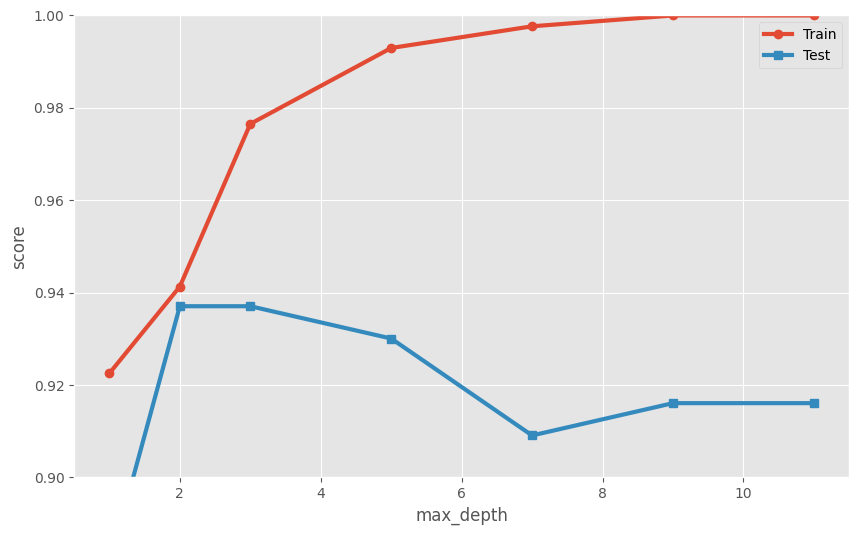

In [180]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, 'o-', linewidth=3, label='Train')
plt.plot(max_depths, test_scores, 's-', linewidth=3, label='Test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.ylim(0.9, 1)
plt.legend()

# H-Nombre minimum d'échantillons requis pour qu'un nœud devienne un nœud feuille ?
On se propose de varier le paramère nombre minimal d'échantillons (l'hyperparamètre min_samples_leaf) pour qu'un noeud devienne feuille

In [181]:
# Définir les différentes valeurs de min_samples_leaf
min_samples_leafs = np.arange(1, 20)

# Initialiser les listes pour stocker les scores
train_scores = []
test_scores = []

# Exécuter le modèle pour chaque valeur de min_samples_leaf
for min_samples_leaf in min_samples_leafs:
    model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    model.fit(X_train, Y_train)
    
    train_score = model.score(X_train, Y_train)
    test_score = model.score(X_test, Y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

print("Train scores: ", train_scores)
print("Test scores: ", test_scores)

Train scores:  [1.0, 0.9929577464788732, 0.9835680751173709, 0.9765258215962441, 0.971830985915493, 0.9647887323943662, 0.9647887323943662, 0.9647887323943662, 0.960093896713615, 0.960093896713615, 0.960093896713615, 0.960093896713615, 0.960093896713615, 0.960093896713615, 0.9553990610328639, 0.931924882629108, 0.931924882629108, 0.931924882629108, 0.931924882629108]
Test scores:  [0.916083916083916, 0.916083916083916, 0.9370629370629371, 0.9370629370629371, 0.9370629370629371, 0.9300699300699301, 0.9370629370629371, 0.9370629370629371, 0.9370629370629371, 0.9370629370629371, 0.9370629370629371, 0.9370629370629371, 0.9370629370629371, 0.9370629370629371, 0.9230769230769231, 0.916083916083916, 0.916083916083916, 0.916083916083916, 0.916083916083916]


Affichage

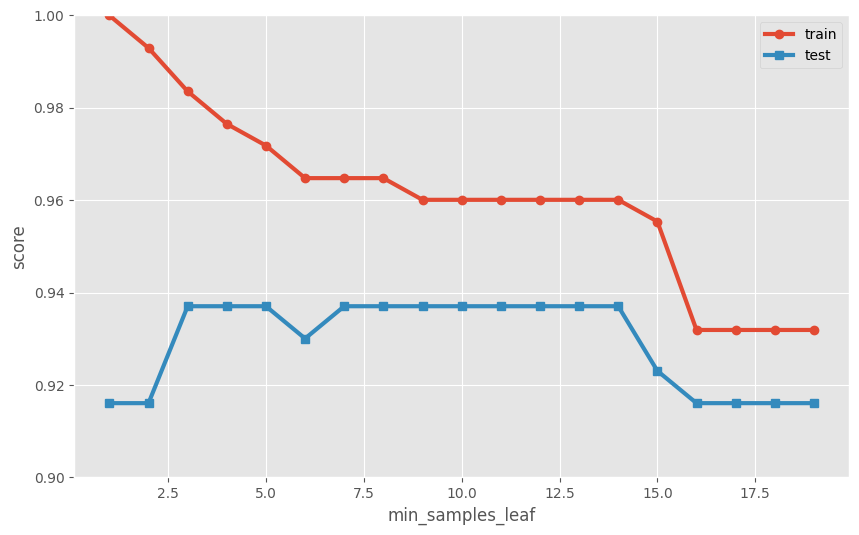

In [182]:
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leafs, train_scores, 'o-', linewidth=3, label='train')
plt.plot(min_samples_leafs, test_scores, 's-', linewidth=3, label='test')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
plt.ylim(0.9, 1)
plt.legend()

# I-Choix des meilleurs Hyperparamètres - GridSearch et cross-validation

In [183]:
from sklearn.model_selection import GridSearchCV

In [184]:
dt = tree.DecisionTreeClassifier(random_state=0)

param_grid = {'max_features': ['sqrt', 'log2'],
              'min_samples_leaf': [2, 4, 8, 16, 32],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1, 2, 3, 5, 7, 9, 11],
              'criterion' :['gini', 'entropy']
             }

grid_search = GridSearchCV(dt, param_grid, cv=5, verbose=True)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 5, 7, 9, 11],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 8, 16, 32]},
             verbose=True)

In [185]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, max_features='sqrt',
                       min_samples_leaf=2, random_state=0)

## Forêts Aléatoires
L'un des inconvénients des arbres de décision est qu'ils n'ont pas tendance à avoir la meilleure précision prédictive. Cela s'explique en partie par une variance élevée, ce qui signifie que des divisions différentes des données d'apprentissage peuvent donner lieu à des arbres très différents.
Nous continuons avec le dataset Breast Cancer

### Charger les données et diviser les en training et test datasets.

### Random Forest - Implémentation `scikit-learn`

<b>1:</b> Importer le model

In [186]:
from sklearn.ensemble import RandomForestClassifier

<b>2:</b> Instancier le modèle

In [187]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)

<b>3:</b> Entrainement

In [188]:
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

<b>4:</b> Prediction des labels pour de nouvelles données (data test)

In [189]:
rf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

### Performances du modèle

In [190]:
score = rf.score(X_test, Y_test)
print(score)

0.972027972027972


### Visualisation des Estimateurs

In [191]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035),
 DecisionTreeClassifier(max_features='sqrt', random_state=626610453),
 DecisionTreeClassifier(max_features='sqrt', random_state=1650906866),
 DecisionTreeClassifier(max_features='sqrt', random_state=1879422756),
 DecisionTreeClassifier(max_features='sqrt', random_state=1277901399),
 DecisionTree

In [192]:
# Nous disposons de 100 estimateurs
print(len(rf.estimators_))

100


In [193]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

Nous pouvons visualiser des arbres à partir du random Forest ....

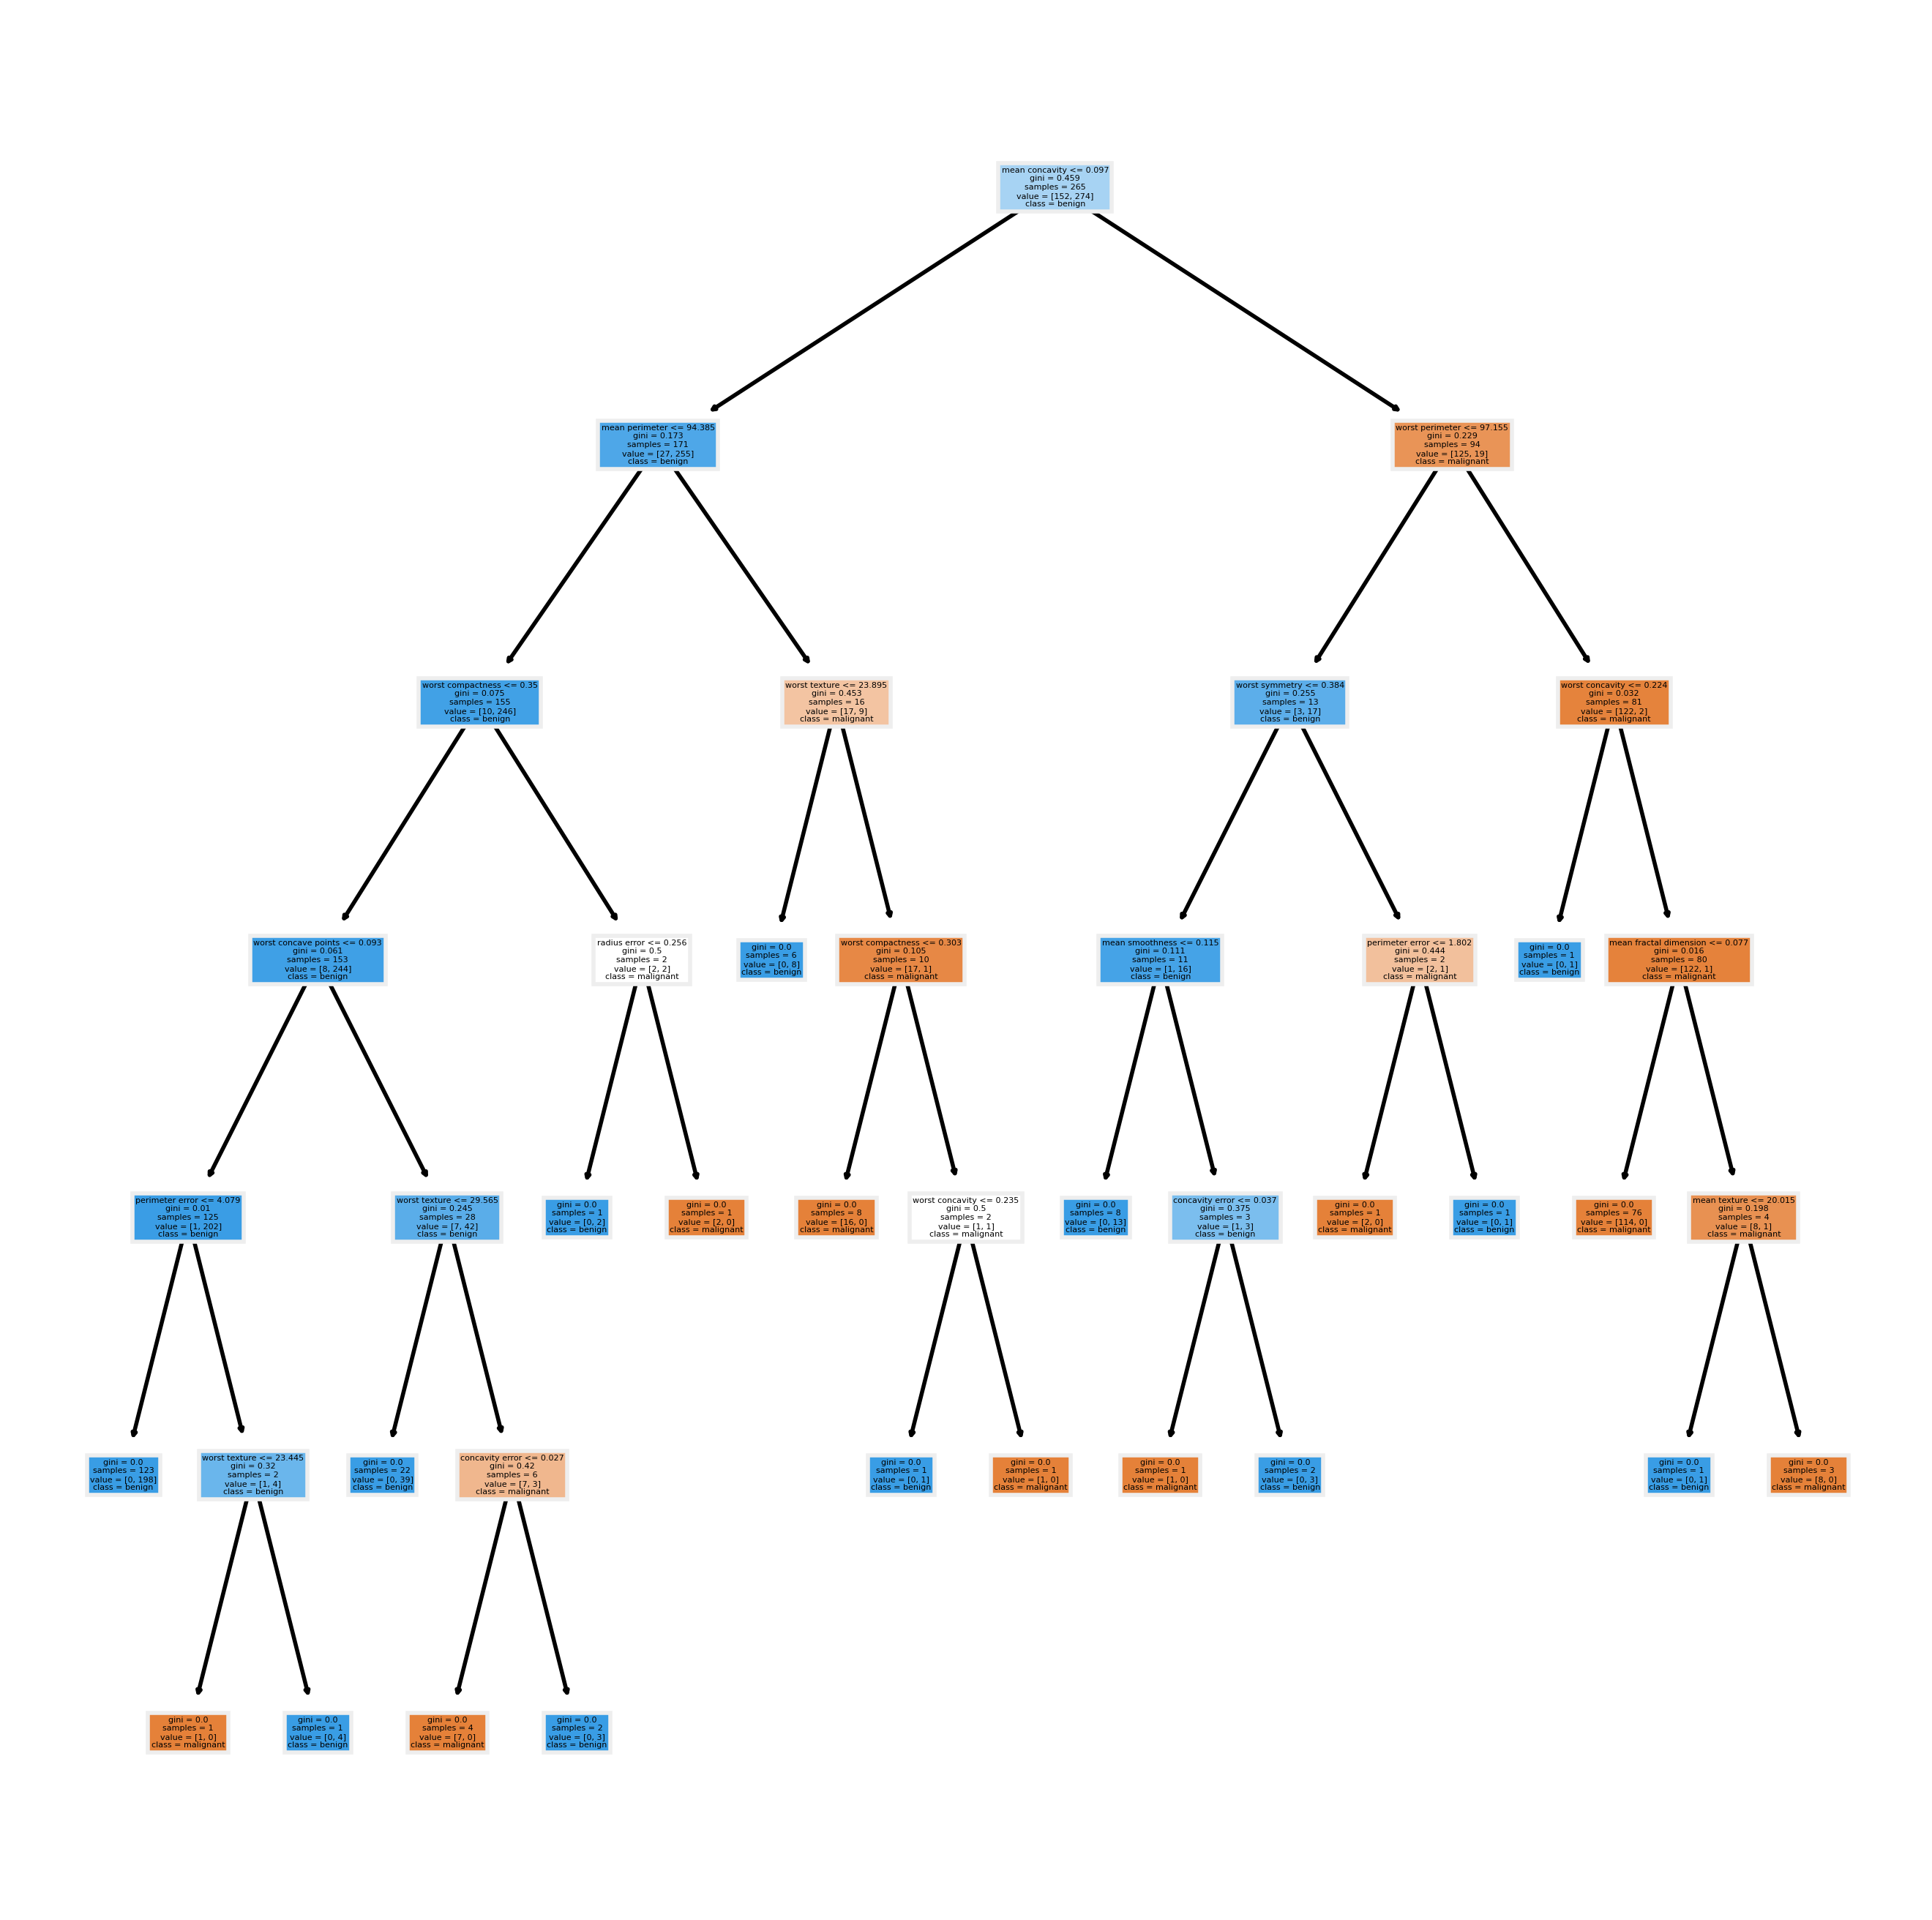

In [194]:
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

Afficher les 5 premiers arbres

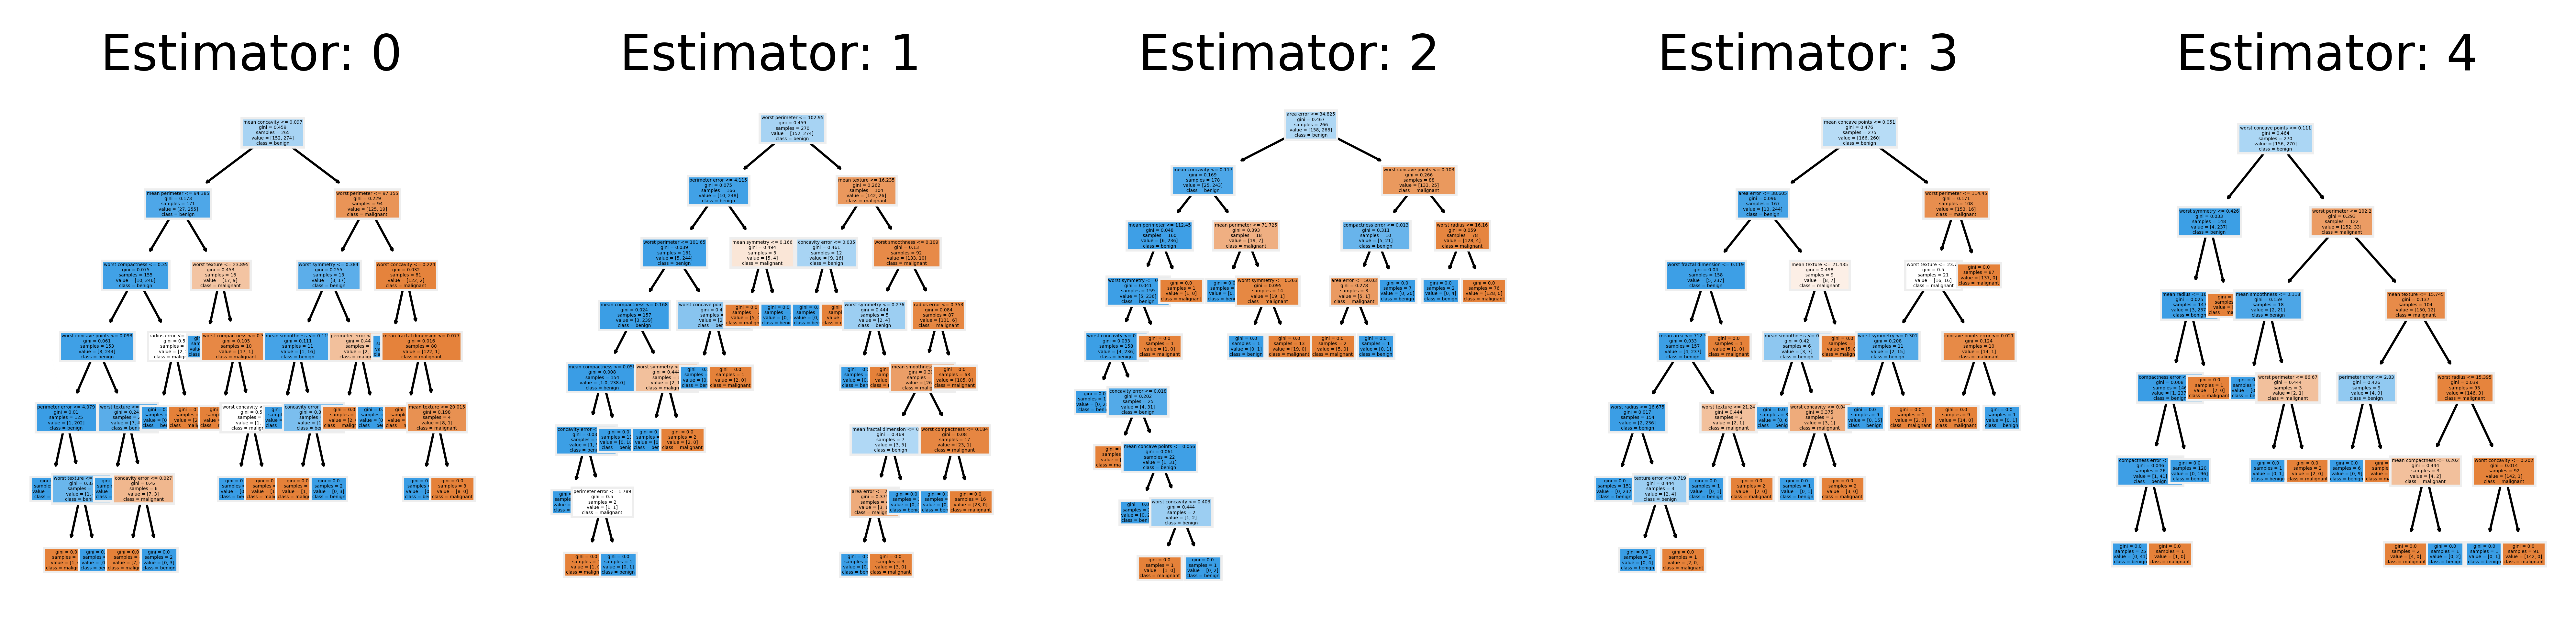

In [195]:
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=1000)

for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn,
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)


fig.savefig('rf_5trees.png')

**Hyperparametres - GridSearch Cross validation**

Appliquer GridSearchCV au random Forest pour trouver les meilleurs paramètres

In [196]:
rf = RandomForestClassifier()

grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [None, 5, 10, 15, 20],
    'criterion' :['gini', 'entropy'],
    'random_state' : [0]
}

grid_search = GridSearchCV(rf, grid, cv=5, verbose=True)
grid_search.fit(X_train, Y_train)

final_model = grid_search.best_estimator_
final_model

Fitting 5 folds for each of 80 candidates, totalling 400 fits


RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=10, random_state=0)